In [28]:
# LOGISTIC REGRESSION IMPELEMENTATION
# Importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
# Training and testing data preperation
training_data = pd.read_csv("../Data/TrainingData.csv")


In [29]:
# Define model, train and test
from sklearn.linear_model import LogisticRegression

targets = training_data['home_team_result'].values 
features = training_data.drop(["home_team_name", "away_team_name", "home_team_goal_count" ,"away_team_goal_count", "winner_encoded", "home_team_result"  ], axis=1)
# targets = training_data['home_team_result'].values 
training_features , training_targets = features, targets

testing_data = pd.read_csv("../Data/TestingData.csv")
test_target = testing_data['home_team_result'].values
testing_data = testing_data.drop(["home_team_result"],axis=1)

# target_from_old_csv  = pd.read_csv('../Data/Dataset.csv')["home_team_result"].tail(16).values

# # display(testing_data)


test_features = testing_data.drop(["home_team_name", "away_team_name", "home_team_goal_count" ,"away_team_goal_count" ], axis=1)
# test_target = target_from_old_csv

print(test_target)

testing_features, testing_targets = test_features, test_target

model = LogisticRegression(max_iter = 1000)

model.fit(training_features, training_targets)

outcome_predict = model.predict(testing_features)



print(model.predict(testing_features))
print(model.score(testing_features, testing_targets))
# print(model.score(training_features, training_targets))




[1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
0.5


In [25]:
# Generate graphs
from sklearn.metrics import confusion_matrix 

cf_matrix = confusion_matrix(outcome_predict,testing_targets)

print(cf_matrix)



[[3 6]
 [2 5]]


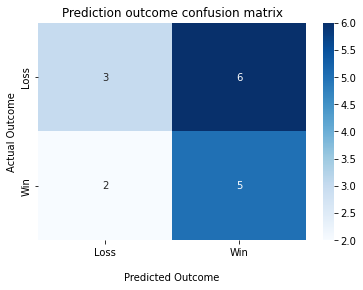

In [30]:
import seaborn as sns 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Prediction outcome confusion matrix')
ax.set_xlabel('\nPredicted Outcome')
ax.set_ylabel('Actual Outcome');

ax.xaxis.set_ticklabels(['Loss','Win'])
ax.yaxis.set_ticklabels(['Loss','Win'])

plt.show()
# fig = plt.figure()
# fig.savefig("anything.png")